In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
sy.init_printing(pretty_print=True)

# Wheel Loads

### Assumptions Used
- Steady-State Operating conditions
- Linear prperties (spring rates, roll rates, etc)
- Superposition of effects.
- Reasonably stiff chassis to be considered rigid.

### CG Location

In [2]:
w,w1,w2,w3,w4,tf,tr,d=sy.symbols('w,w1,w2,w3,w4,t_F,t_R,d')

#Lateral shift from longitudinal axis y"
y_dash=(w2/w)*(tf-d)-(w1/w)*d+(w4*tr/w)
y_ddash=y_dash-(tr/2)
y_ddash

### Chassis Stiffness

### Lateral Load Transfer

In [3]:
w,wl,wr,ay,h,t,delta_w=sy.symbols('W,W_L,W_R,A_Y,h,t,Delta_W')
wl=(w/2)+(w*ay*h/t)
llt=ay*h/t # total lateral load transfer as a fraction of total weight
delta_w

#### TLLTD (Total Lateral Load Transfer Distribution)

In [4]:
W_s,h_2,K_Fd,K_F,K_R,l,a_s,z_RF,z_WF,W_uF,t_F=sy.symbols("W_s,h_2,K_F',K_F,K_R,l,a_s,z_RF,z_WF,W_uF,t_F")
delta_W_F=ay*((W_s/t_F)*((h_2*K_Fd/(K_F+K_R-W_s*h_2))+(((l-a_s)/l)*z_RF))+(W_uF*z_WF/t_F))

In [5]:
t_R,K_Rd,W_uR,z_WR,z_RR=sy.symbols("t_R,K_R',W_uR,z_WR,z_RR")
delta_W_R=ay*((W_s/t_R)*((h_2*K_Rd/(K_F+K_R-W_s*h_2))+((a_s/l)*z_RR))+(W_uR*z_WR/t_R))

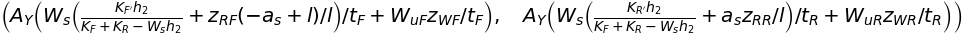

In [6]:
delta_W_F,delta_W_R

#### TLLTD (Total Lateral Load Transfer Distribution)


In [7]:
W=350               #Total weight (kg)
h=320*10**-3        #CG height (m)
l=1.6               #Wheelbase (m)
a=l*0.5             #Front track to CG position (m)
b=l-a               #Rear track to CG position (m)
t_F=1.150           #Front Track (m)
t_R=1.100           #Rear Track (m)
z_RF=55*10**-3      #Front RC height (m)
z_RR=80*10**-3      #Rear RC height (m)
H=252.5*10**-3         #CG to NRA height (m)
K_F=(952/9.81)/(np.pi/180) #Front Roll Stiffness (kg.m/rad)
K_R=(891/9.81)/(np.pi/180) #Front Roll Stiffness (kg.m/rad)
A_y=1.2

W_s=W
h_2=H
K_Fd=K_F
K_Rd=K_R
a_s=a
z_WF=z_RF
z_WR=z_RR
W_uF=0
W_uR=0

delta_W_R=A_y*((W_s/t_R)*((h_2*K_Rd/(K_F+K_R-W_s*h_2))+((a_s/l)*z_RR))+(W_uR*z_WR/t_R))
delta_W_F=A_y*((W_s/t_F)*((h_2*K_Fd/(K_F+K_R-W_s*h_2))+(((l-a_s)/l)*z_RF))+(W_uF*z_WF/t_F))
K_phi=(W*H)/(K_F+K_R-W*h_2)*180/np.pi

In [8]:
{sy.Symbol('Delta_W_F'):delta_W_F,sy.Symbol('Delta_W_R'):delta_W_R,'TLLT':delta_W_F+delta_W_R,'Roll_Rate':K_phi,'LLT':(delta_W_F+delta_W_R)/W}

{Delta_W_F: 58.0726150283426,
 Delta_W_R: 62.26762317493432,
 'TLLT': 120.34023820327693,
 'Roll_Rate': 0.4743003382722751,
 'LLT': 0.34382925200936265}

### Longitudinal Weight Transfer

In [9]:
A_x=1.2 #Logitudinal Acceleration (g)
delta_x=(h/l)*W*A_x
delta_x

In [10]:
w1=w2=w3=w4=W/4

### Cornering Only

In [11]:
w1c=w1+delta_W_F #Outer Front
w2c=w2-delta_W_F #Inner Front
w3c=w3+delta_W_R #Outer Rear
w4c=w4-delta_W_R #Inner Rear
w1c,w2c,w3c,w4c

### Braking Only

In [12]:
w1b=w2b=w1+(delta_x*0.5)
w3b=w4b=w3-(delta_x*0.5)
w1b,w2b,w3b,w4b

### Cornering and Braking

In [13]:
theta_friction=np.deg2rad(45)
A_y=1.2*np.cos(theta_friction)
A_x=1.2*np.sin(theta_friction)
delta_W_R=A_y*((W_s/t_R)*((h_2*K_Rd/(K_F+K_R-W_s*h_2))+((a_s/l)*z_RR))+(W_uR*z_WR/t_R))
delta_W_F=A_y*((W_s/t_F)*((h_2*K_Fd/(K_F+K_R-W_s*h_2))+(((l-a_s)/l)*z_RF))+(W_uF*z_WF/t_F))
delta_x=(h/l)*W*A_x

w1t=w1+(0.5*delta_x)+delta_W_F
w2t=w2+(0.5*delta_x)-delta_W_F
w3t=w3-(0.5*delta_x)+delta_W_R
w4t=w4-(0.5*delta_x)-delta_W_R

w1f={'c':w1t*A_y*9.81,'b':w1t*A_x*9.81,'v':w1t*9.81}
w2f={'c':w2t*A_y*9.81,'b':w2t*A_x*9.81,'v':w2t*9.81}
w3f={'c':w3t*A_y*9.81,'b':w3t*A_x*9.81,'v':w3t*9.81}
w4f={'c':w4t*A_y*9.81,'b':w4t*A_x*9.81,'v':w4t*9.81}

w1f,w2f,w3f,w4f,delta_x,delta_W_F+delta_W_R

({'b': 1317.3827520180278, 'c': 1317.3827520180278, 'v': 1552.5504622835724},
 {'b': 633.75192790437882, 'c': 633.75192790437882, 'v': 746.88380968539036},
 {'b': 847.65056996886665, 'c': 847.65056996886665, 'v': 998.96577683604619},
 {'b': 114.63610995353987, 'c': 114.63610995353987, 'v': 135.09995119499121},
 59.396969619669989,
 85.093398483141542)

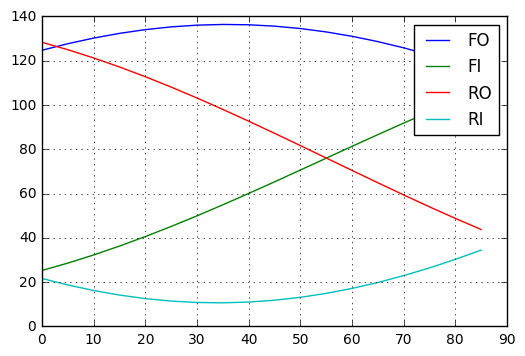

In [151]:
w1l=[]
w2l=[]
w3l=[]
w4l=[]
theta=90
for i in np.arange(0,theta,5):
    theta_friction=np.deg2rad(i)
    A_y=1.2*np.cos(theta_friction)
    A_x=1.2*np.sin(theta_friction)
    delta_W_R=A_y*((W_s/t_R)*((h_2*K_Rd/(K_F+K_R-W_s*h_2))+((a_s/l)*z_RR))+(W_uR*z_WR/t_R))
    delta_W_F=A_y*((W_s/t_F)*((h_2*K_Fd/(K_F+K_R-W_s*h_2))+(((l-a_s)/l)*z_RF))+(W_uF*z_WF/t_F))
    delta_x=(h/l)*W*A_x

    w1t=w1+(0.5*delta_x)+delta_W_F
    w2t=w2+(0.5*delta_x)-delta_W_F
    w3t=w3-(0.5*delta_x)+delta_W_R
    w4t=w4-(0.5*delta_x)-delta_W_R
    
    w1l.append(w1t)
    w2l.append(w2t)
    w3l.append(w3t)
    w4l.append(w4t)
plt.plot(np.arange(0,theta,5),w1l,label='FO')
plt.plot(np.arange(0,theta,5),w2l,label='FI')
plt.plot(np.arange(0,theta,5),w3l,label='RO')
plt.plot(np.arange(0,theta,5),w4l,label='RI')
plt.legend()
plt.grid()
plt.show()

In [14]:
200/130